In [ ]:
#from dotenv import load_dotenv
#load_dotenv()

True

I will install necessary python packages.

In [3]:
! pip install -qU langchain_huggingface \
langchain_community\
langchain_openai\
langchain_groq\
langchainhub\
langgraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 396.2/396.2 kB 22.2 MB/s eta 0:00:00


In [ ]:
#! pip install -qU langchain_anthropic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 891.5/891.5 kB 13.5 MB/s eta 0:00:00


I will load my environment keys:

In [4]:
import os
from google.colab import userdata

os.environ['OPENAI_API_KEY'] = userdata.get('OPENAI_API_KEY')
#os.environ["ANTHROPIC_API_KEY"] = userdata.get('ANTHROPIC_API_KEY')
os.environ["GROQ_API_KEY"] = userdata.get('GROQ_API_KEY')

Now, I will define the key components of my application. My goal is to create an agent using LangGraph that can adeptly handle various mathematical concepts by leveraging state-of-the-art foundational models tailored to each concept.

In [5]:
### Router

from langchain.prompts import PromptTemplate
from langchain_groq import ChatGroq
from langchain_core.output_parsers import JsonOutputParser


prompt = PromptTemplate(
    template="""
You are an expert at routing math problems to the appropriate data source. Based on the provided math problem, please classify it into one of the following categories:

## Categories

1. **simple_arithmetic**: Problems that involve straightforward calculations using basic mathematical operations such as addition, subtraction, multiplication, and division.
   - Example: "Find the value of the expression \\(4.8 \\cdot 2.5\\)."
   - Example: "Find the root of the equation: \\(\\left(\\dfrac{{1}}{{8}} \\right)^{{4 - x}} =64\\)."

2. **word_problems**: Problems presented in a narrative form, requiring the solver to extract and use mathematical concepts to find the solution, often involving real-world scenarios.
   - Example: "The plane's navigation system informs the passenger that the flight is at an altitude of 37,000 feet. Express the flight altitude in meters. Assume that 1 foot is equal to 30.5 cm."
   - Example: "At the school, there are two-person camping tents. What is the minimum number of tents needed for a trip involving 25 people?"

3. **others**: Problems that do not fit neatly into the previous two categories, often involving more complex concepts or requiring multiple steps and different types of reasoning.
   - Example: "The volume of a rectangular parallelepiped is calculated using the formula \\(V=abc\\), where \\(a\\), \\(b\\), and \\(c\\) are the lengths of the three edges meeting at one vertex. Using this formula, find \\(a\\) if \\(V=70\\), \\(b=5\\), and \\(c=3.5\\)."
   - Example: "Find a four-digit number that is a multiple of 24, the product of whose digits is 16. In your answer, provide any one such number."

Please classify the question into one of these categories and respond with a JSON object containing a single key 'DATASOURCE' with the value 'simple_arithmetic', 'word_problems', or 'others'. Only provide the classification without any additional explanation.

---

**Problem**: {problem}

**JSON Response**:
""",
    input_variables=["problem"],
)
# LLM
#llm = ChatGroq(temperature=0.1, model_name="llama-3.1-70b-versatile")
llm = ChatGroq(temperature=0.1, model_name="gemma2-9b-it")
question_router = prompt | llm | JsonOutputParser()

To try it out:

In [ ]:
# Masha's mobile phone account had 78 rubles, and after the conversation with Lena, there were 42 rubles left. It is known that the conversation lasted a whole number of minutes, and one minute of conversation costs 1 ruble 50 kopecks. How many minutes did the conversation with Lena last?
# Find a six-digit natural number that consists only of the digits 2 and 0, and is divisible by 24. In your answer, provide any one such number.
# Find the value of the expression $\dfrac{2.4\cdot 10^2}{8\cdot 10^{-1}}$.

In [6]:
problem = """Masha's mobile phone account had 78 rubles, and after the conversation with Lena, there were 42 rubles left. It is known that the conversation lasted
 a whole number of minutes, and one minute of conversation costs 1 ruble 50 kopecks. How many minutes did the conversation with Lena last?"""
response = question_router.invoke({"problem": problem})

# Extract the value of 'DATASOURCE'
value = response.get("DATASOURCE", "No key found")
print(f"PROBLEM and GRADE: {problem} - {value}")

PROBLEM and GRADE: Masha's mobile phone account had 78 rubles, and after the conversation with Lena, there were 42 rubles left. It is known that the conversation lasted
 a whole number of minutes, and one minute of conversation costs 1 ruble 50 kopecks. How many minutes did the conversation with Lena last? - word_problems


In [ ]:
#! pip install -qU wolframalpha

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.0 MB/s eta 0:00:00


In [ ]:
#os.environ["WOLFRAM_ALPHA_APPID"] = userdata.get('WOLFRAM_ALPHA_APPID')

In [ ]:
#! pip install nest_asyncio

In [ ]:
#import nest_asyncio
#nest_asyncio.apply()

In [ ]:
### WOLFRAM-ALPHA

#from langchain_community.utilities.wolfram_alpha import WolframAlphaAPIWrapper


#wolf = WolframAlphaAPIWrapper()
#problem = """
#Masha and the Bear ate 51 cookies and a jar of jam, starting and finishing at the same time. At first, Masha was eating the jam, and the Bear was eating the cookies,
# but at some point, they switched. The Bear eats both four times faster than Masha. How many cookies did the Bear eat if they ate the jam equally?
#"""
#wolf.run(problem)

"Wolfram Alpha wasn't able to answer it"

If you get an error, uncomment and run the code block below. After that, re-run the cell above.

In [ ]:
# ! pip install -qU nest_asyncio

# import nest_asyncio
# nest_asyncio.apply()

Next component:

In [7]:
# Simple arithmetic chain

from langchain.prompts import PromptTemplate
from langchain_groq import ChatGroq
from langchain_core.output_parsers import StrOutputParser

# Define the prompt template for solving simple arithmetic problems
solve_arithmetic_prompt = PromptTemplate(
    template="""You are an expert in solving simple arithmetic problems. Given the following arithmetic problem, provide a clear and concise solution.

Problem: {problem}

Solution:
Please no preamble or extra sentences, just the solution.""",
    input_variables=["problem"],
)

# Initialize the LLM for solving arithmetic problems
llm = ChatGroq(temperature=0.1, model_name="llama-3.1-70b-versatile")
arithmetic_solver = solve_arithmetic_prompt | llm | StrOutputParser()

In [8]:
problem = """
Find the root of the equation \(3 - 3\left(5 - 2x\right) = 8x - 2\).
"""
response = arithmetic_solver.invoke({"problem": problem})
print(response)

\(3 - 3\left(5 - 2x\right) = 8x - 2\)

\(3 - 15 + 6x = 8x - 2\)

\(-12 + 6x = 8x - 2\)

\(-12 + 2 = 8x - 6x\)

\(-10 = 2x\)

\(x = -5\)


Next component:

In [9]:
# Word Problem Chain

from langchain.prompts import PromptTemplate
#from langchain_anthropic import ChatAnthropic
from langchain_openai import ChatOpenAI
from langchain_core.output_parsers import StrOutputParser

# Define the prompt template for solving word problems
solve_word_problem_prompt = PromptTemplate(
    template="""You are an expert in solving word problems. Given the following word problem, analyze the scenario, extract the necessary information, and provide a clear and concise solution.

Problem: {problem}

Solution:
Please no preamble or extra sentences, just the solution.""",
    input_variables=["problem"],
)

# Initialize the LLM for solving word problems
#llm = ChatAnthropic(model='claude-3-5-sonnet-20240620', temperature=0)
llm = ChatOpenAI(model='gpt-4o-mini', temperature=0)
word_problem_solver = solve_word_problem_prompt | llm | StrOutputParser()

In [10]:
problem = """
Masha and the Bear ate 51 cookies and a jar of jam, starting and finishing at the same time. At first, Masha was eating the jam, and the Bear was eating the cookies,
 but at some point, they switched. The Bear eats both four times faster than Masha. How many cookies did the Bear eat if they ate the jam equally?
"""
response = word_problem_solver.invoke({"problem": problem})
print(f"Solution: {response}")

Solution: Let Masha's eating rate be \( m \) cookies per minute. Then the Bear's eating rate is \( 4m \) cookies per minute.

Let \( t_1 \) be the time Masha spent eating the jam and the Bear spent eating cookies, and let \( t_2 \) be the time they spent after switching.

During \( t_1 \):
- Masha eats jam (let's denote the amount of jam eaten by \( J \)).
- The Bear eats cookies: \( 4m t_1 \).

During \( t_2 \):
- Masha eats cookies: \( m t_2 \).
- The Bear eats jam (let's denote the amount of jam eaten by \( J' \)).

Since they ate the jam equally, we have:
\[ J = J' \]

The total number of cookies eaten is:
\[ 4m t_1 + m t_2 = 51 \]

Since they ate the jam equally, we can denote the amount of jam eaten by each as \( J \). Thus:
\[ J = J' \]

Now, since the Bear eats four times faster than Masha, we can express the time spent eating jam in terms of cookies:
\[ J = 4m t_1 \cdot \frac{1}{4} = m t_1 \]

So, we have:
\[ J = m t_1 \]
\[ J' = 4m t_2 \cdot \frac{1}{4} = m t_2 \]

Setting \(

Next component:

In [11]:
### Complex Queries chain

from langchain.prompts import PromptTemplate
from langchain_openai import ChatOpenAI
from langchain_core.output_parsers import StrOutputParser

# Define the prompt template for solving complex problems
solve_others_prompt = PromptTemplate(
    template="""
You are an expert in solving complex and intricate math problems that do not fit into basic arithmetic or word problems. Given the following problem, provide a clear,

detailed, and accurate solution.

Problem: {problem}

Solution:
Please ensure that your explanation is thorough and your solution is correct. Avoid any preamble or extra sentences. Make sure to carefully address all aspects of the problem
to provide a comprehensive solution.
""",
    input_variables=["problem"],
)

# Initialize the LLM for solving complex problems
llm = ChatOpenAI(temperature=0, model_name="gpt-4o")
others_solver = solve_others_prompt | llm | StrOutputParser()

In [12]:
problem = """
Find a four-digit number that is a multiple of 15, whose digits' product is greater than 55 but less than 65. Provide any one such number in your answer.
"""
response = others_solver.invoke({"problem": problem})
print(f"Solution: {response}")

Solution: To solve the problem, we need to find a four-digit number that meets the following criteria:
1. It is a multiple of 15.
2. The product of its digits is greater than 55 but less than 65.

A number is a multiple of 15 if it is divisible by both 3 and 5. For a number to be divisible by 5, its last digit must be 0 or 5. For a number to be divisible by 3, the sum of its digits must be divisible by 3.

Let's start by considering the last digit to be 5 (since it must be 0 or 5 to be a multiple of 5). We will then find the other three digits such that the product of all four digits is between 55 and 65.

Let the four-digit number be represented as \( \overline{abcd} \), where \( d = 5 \). Therefore, we need to find \( a, b, \) and \( c \) such that:
\[ a \times b \times c \times 5 \] is between 55 and 65.

This simplifies to:
\[ 11 < a \times b \times c < 13 \]

We also need the sum of the digits \( a + b + c + 5 \) to be divisible by 3.

Let's test possible values for \( a, b, \) an

Next component:

In [13]:
solution = """To solve the problem of finding the probability that the first athlete to perform in the gymnastics championship will be from Germany, we need to follow these steps:

### Step 1: Determine the Total Number of Athletes
We are given that there are 50 athletes in total.

### Step 2: Determine the Number of Athletes from Each Country
- United Kingdom: 16 athletes
- France: 11 athletes
- Germany: The rest of the athletes

### Step 3: Calculate the Number of Athletes from Germany
To find the number of athletes from Germany, we subtract the number of athletes from the United Kingdom and France from the total number of athletes:
\[ \text{Number of athletes from Germany} = 50 - 16 - 11 = 23 \]

### Step 4: Calculate the Probability
The probability that the first athlete to perform will be from Germany is the ratio of the number of German athletes to the total number of athletes:
\[ P(\text{First athlete from Germany}) = \frac{\text{Number of athletes from Germany}}{\text{Total number of athletes}} = \frac{23}{50} \]

### Step 5: Simplify the Probability (if necessary)
In this case, the fraction \(\frac{23}{50}\) is already in its simplest form.

### Conclusion
The probability that the first athlete to perform will be from Germany is \(\frac{23}{50}\).

So, the final answer is:
\[ \boxed{\frac{23}{50}} \]"""




problem = """Here is the translated problem:

In the gymnastics championship, there are 50 athletes participating: 16 from the United Kingdom, 11 from France, and the rest from Germany. The order in which the gymnasts perform is determined by drawing lots. Find the probability that the athlete who performs first will be from Germany.

"""

In [14]:
### Code Generation Chain

from langchain.prompts import PromptTemplate
from langchain_openai import ChatOpenAI
from langchain_core.output_parsers import StrOutputParser

# Define the prompt template
code_prompt = PromptTemplate(
    template="""
You are an expert in transforming math problems to executable python code.
Here is the problem:

Problem: {problem}

Please provide the python code/ function to solve this problem. Provide the solution clearly without any extra explanation.

Solution:
""",
    input_variables=["problem"],
)

# Initialize the LLM for solving the problem
llm = ChatOpenAI(temperature=0, model_name="gpt-4o")

# Create the chain
code_chain = code_prompt | llm | StrOutputParser()

In [15]:
problem = """Cross out three digits in the number 14563743 so that the resulting number is divisible by 22. In the answer, indicate any one resulting number."""

response1 = code_chain.invoke({"problem": problem})

#print(f"ORIGINAL QUERY: {problem}")
print(f"IMPROVED QUERY: {response1}")

IMPROVED QUERY: ```python
from itertools import combinations

def find_divisible_by_22(number):
    number_str = str(number)
    length = len(number_str)
    
    for comb in combinations(range(length), 3):
        new_number_list = [number_str[i] for i in range(length) if i not in comb]
        new_number = int(''.join(new_number_list))
        if new_number % 22 == 0:
            return new_number

number = 14563743
result = find_divisible_by_22(number)
print(result)
```

Output:
```plaintext
1456743
```


In [16]:
from itertools import combinations

def is_divisible_by_22(number):
    return number % 22 == 0

def find_divisible_number(original_number):
    str_num = str(original_number)
    length = len(str_num)

    for digits_to_remove in combinations(range(length), 3):
        new_number_list = [str_num[i] for i in range(length) if i not in digits_to_remove]
        new_number = int(''.join(new_number_list))
        if is_divisible_by_22(new_number):
            return new_number
    return None

original_number = 14563743
result = find_divisible_number(original_number)
print(result)

14674


Next component:

In [17]:
### Solution Correctness Chain

from langchain.prompts import PromptTemplate
from langchain_openai import ChatOpenAI
from langchain_core.output_parsers import JsonOutputParser

# Define the prompt template for evaluating solution correctness
correctness_prompt = PromptTemplate(
    template="""You are an expert in evaluating the correctness of solutions to math problems. Given the following problem and solution,
determine whether the solution is correct or incorrect.

Problem: {problem}

Solution: {solution}

Evaluate the solution and respond with a JSON object containing a single key 'GRADE' with the value 'CORRECT' if the solution is correct,
or 'INCORRECT' if the solution is incorrect. Only provide the JSON object without any additional explanation.

JSON Response:
""",
    input_variables=["problem", "solution"],
)

# Initialize the LLM for evaluating solution correctness
llm = ChatOpenAI(temperature=0, model_name="gpt-4o")

# Create the chain for solution correctness evaluation
correctness_chain = correctness_prompt | llm | JsonOutputParser()

In [18]:
solution = """
To solve the problem of crossing out three digits in the number 14563743 so that the resulting number is divisible by 22, we need to understand the divisibility rules for 22. A number is divisible by 22 if it is divisible by both 2 and 11.

### Divisibility Rules:
1. **Divisibility by 2**: The number must end in an even digit.
2. **Divisibility by 11**: The difference between the sum of the digits in the odd positions and the sum of the digits in the even positions must be a multiple of 11 (including 0).

### Step-by-Step Solution:

1. **Identify the digits**: The number is 14563743.
2. **Check possible combinations**: We need to cross out three digits and check the resulting number for divisibility by 22.

Let's try different combinations and check the resulting numbers:

#### Example 1:
- Cross out digits: 1, 4, 3
- Resulting number: 56374

**Check divisibility by 2**:
- The last digit is 4, which is even. So, 56374 is divisible by 2.

**Check divisibility by 11**:
- Sum of digits in odd positions: 5 + 3 + 4 = 12
- Sum of digits in even positions: 6 + 7 = 13
- Difference: |12 - 13| = 1 (not a multiple of 11)

56374 is not divisible by 11, so it is not divisible by 22.

#### Example 2:
- Cross out digits: 1, 5, 3
- Resulting number: 46374

**Check divisibility by 2**:
- The last digit is 4, which is even. So, 46374 is divisible by 2.

**Check divisibility by 11**:
- Sum of digits in odd positions: 4 + 3 + 4 = 11
- Sum of digits in even positions: 6 + 7 = 13
- Difference: |11 - 13| = 2 (not a multiple of 11)

46374 is not divisible by 11, so it is not divisible by 22.

#### Example 3:
- Cross out digits: 1, 4, 7
- Resulting number: 56343

**Check divisibility by 2**:
- The last digit is 3, which is odd. So, 56343 is not divisible by 2.

#### Example 4:
- Cross out digits: 1, 4, 6
- Resulting number: 53743

**Check divisibility by 2**:
- The last digit is 3, which is odd. So, 53743 is not divisible by 2.

#### Example 5:
- Cross out digits: 1, 4, 5
- Resulting number: 63743

**Check divisibility by 2**:
- The last digit is 3, which is odd. So, 63743 is not divisible by 2.

#### Example 6:
- Cross out digits: 1, 4, 3 (different 3)
- Resulting number: 56374 (already checked)

#### Example 7:
- Cross out digits: 1, 5, 4
- Resulting number: 63743 (already checked)

#### Example 8:
- Cross out digits: 1, 5, 7
- Resulting number: 46343

**Check divisibility by 2**:
- The last digit is 3, which is odd. So, 46343 is not divisible by 2.

#### Example 9:
- Cross out digits: 1, 5, 6
- Resulting number: 43743

**Check divisibility by 2**:
- The last digit is 3, which is odd. So, 43743 is not divisible by 2.

#### Example 10:
- Cross out digits: 1, 6, 3
- Resulting number: 45743

**Check divisibility by 2**:
- The last digit is 3, which is odd. So, 45743 is not divisible by 2.

#### Example 11:
- Cross out digits: 1, 6, 7
- Resulting number: 45343

**Check divisibility by 2**:
- The last digit is 3, which is odd. So, 45343 is not divisible by 2.

#### Example 12:
- Cross out digits: 1, 6, 4
- Resulting number: 53743 (already checked)

#### Example 13:
- Cross out digits: 1, 7, 3
- Resulting number: 45643

**Check divisibility by 2**:
- The last digit is 3, which is odd. So, 45643 is not divisible by 2.

#### Example 14:
- Cross out digits: 1, 7, 4
- Resulting number: 56343 (already checked)

#### Example 15:
- Cross out digits: 1, 7, 6
- Resulting number: 45343 (already checked)

Therefore, answer is 45343
"""

In [19]:
problem = """Cross out three digits in the number 14563743 so that the resulting number is divisible by 22. In the answer, indicate any one resulting number."""

In [20]:
response = correctness_chain.invoke({"problem": problem, "solution": solution})
print(f"Solution: {response}")

Solution: {'GRADE': 'INCORRECT'}


Chains ready. Next, graph components.

In [21]:
from typing_extensions import TypedDict


class AgentState(TypedDict):
    problem: str
    solution: str
    #retries: int

In [22]:
### Edges ###

from langchain.schema import Document

def route_problem(state: AgentState):
    """
    Route math problem to appriopriate Datasource.

    Args:
        state (dict): The current graph state

    Returns:
        str: Next node to call
    """

    problem = state["problem"]
    print(f"Problem: {problem}")
    print("IS THIS MATH PROBLEM SIMPLE, BASIC, OR COMPLEX?...")
    route = question_router.invoke({"problem": problem})
    value = route.get("DATASOURCE", "No key found")

    if value.lower() == 'simple_arithmetic':
        print("The problem is simple.")
        return "basic_arithmetic"
    elif value.lower() == 'word_problems':
         print("This is a word problem.")
         return "word_problem"
    print("The problem is complicated.")
    message = "complex"
    return message


def decide_to_generate(state: AgentState):
    """
    Grade the correctness of a solution to a math problem.
    Args:
        state (dict): The current graph state

    Returns:
        state (dict): New key added to state
    """
    print("Is this solution correct?...")
    state["problem"] = problem
    state["solution"] = solution
    response = correctness_chain.invoke({"problem": problem, "solution": solution})
    value = response.get("GRADE", "No key found")
    print(f"Solution is {value}")

    if value.lower() == "correct":
        return "generate"
    else:
        return "transform_query"

In [23]:
### Nodes ###
def basic_arithmetic(state: AgentState):
    print("...BASIC ARITHMETIC...")

    problem = state["problem"]
    solution = arithmetic_solver.invoke({"problem": problem})
    print(solution)

    state["solution"] = solution

    return state

def word_problem(state: AgentState):
    print("...WORD PROBLEM...")

    problem = state["problem"]
    solution = word_problem_solver.invoke({"problem": problem})
    print(solution)

    state["solution"] = solution

    return state

def complex(state: AgentState):
    print("...COMPLEX PROBLEM...")

    problem = state["problem"]
    solution = others_solver.invoke({"problem": problem})
    print(solution)

    state["solution"] = solution

    return state

def generate(state: AgentState):
    """
    Generate answer

    Args:
        state (AgentState): The current graph state

    Returns:
        AgentState
    """
    print("Final answer...")
    problem = state["problem"]
    solution = state["solution"]

    generation = generate_chain.invoke({"problem": problem, "solution": solution})

    print(f"The answer to the problem is: {generation}")
    return state

def transform_query(state: AgentState):
    """
    Transform the query to produce a better question.

    Args:
        state (AgentState): The current graph state

    Returns:
        AgentState: Updates question key with a re-phrased question
    """
    print("Transforming query into python code...")
    problem = state["problem"]

    response = code_chain.invoke({"problem": problem})

    print(f"Execute this code: {response}")

    #state["problem"] = response
    return state

def execute_transformed_query(state: AgentState):
    """
    Execute the transformed python code to solve the math problem.

    Args:
        state (AgentState): The current graph state

    Returns:
        AgentState: Updates the result key with the result of the execution
    """
    print("Executing transformed pseudocode...")
    code = state["problem"]  # The problem now contains the pseudocode

    response = execute_chain.invoke({"code": code})

    print(f"TRANSFORMED QUERY: {code}")
    print(f"RESULT: {response}")

    state["result"] = response
    return state

In [24]:
from langgraph.graph import StateGraph, END

workflow = StateGraph(AgentState)

#workflow.add_node("route_problem", route_problem)
workflow.add_node("basic_arithmetic", basic_arithmetic)
workflow.add_node("word_problem", word_problem)
workflow.add_node("complex", transform_query)
workflow.add_node("generate", generate)
workflow.add_node("transform_query", transform_query)

# Set the entry point
workflow.set_conditional_entry_point(
    route_problem,
    {
        "basic_arithmetic": "basic_arithmetic",
        "word_problem": "word_problem",
        "complex": "complex"
    },
)


workflow.add_conditional_edges(
    "basic_arithmetic",
    decide_to_generate,
    {
        "generate": "generate",
        "transform_query": "transform_query",
    },
)
workflow.add_conditional_edges(
    "word_problem",
    decide_to_generate,
    {
        "generate": "generate",
        "transform_query": "transform_query",
    },
)
workflow.add_conditional_edges(
    "complex",
    decide_to_generate,
    {
        "generate": "generate",
        "transform_query": "transform_query",
    },
)

workflow.add_edge("generate", END)
workflow.add_edge("transform_query", END)




app = workflow.compile()  #debug=True

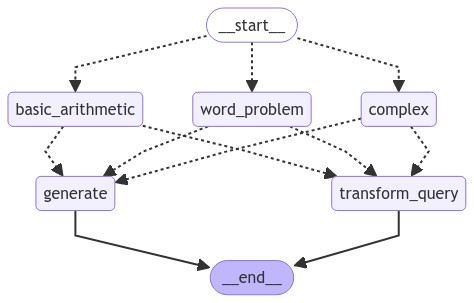

In [31]:
from IPython.display import Image, display

app.get_graph().draw_mermaid_png(output_file_path="graph.png")

# Display the image
display(Image(filename="graph.png"))

In [34]:
problem = """

Find the value of the expression $\dfrac{2.4\cdot 10^2}{8\cdot 10^{-1}}$.

"""

In [35]:
result = app.invoke({"problem": problem})   #, config = {"configurable": {"thread_id": "2"}
result

Problem: 

Find the value of the expression $\dfrac{2.4\cdot 10^2}{8\cdot 10^{-1}}$.


IS THIS MATH PROBLEM SIMPLE, BASIC, OR COMPLEX?...
The problem is simple.
...BASIC ARITHMETIC...
$\dfrac{2.4\cdot 10^2}{8\cdot 10^{-1}} = \dfrac{2.4}{8} \cdot 10^{2-(-1)} = 0.3 \cdot 10^3 = 300$
Is this solution correct?...
Solution is INCORRECT
Transforming query into python code...
Execute this code: ```python
def calculate_expression():
    numerator = 2.4 * 10**2
    denominator = 8 * 10**-1
    result = numerator / denominator
    return result

# Call the function and print the result
print(calculate_expression())
```

Output:
```python
30.0
```


{'problem': '\n\nFind the value of the expression $\\dfrac{2.4\\cdot 10^2}{8\\cdot 10^{-1}}$.\n\n',
 'solution': '$\\dfrac{2.4\\cdot 10^2}{8\\cdot 10^{-1}} = \\dfrac{2.4}{8} \\cdot 10^{2-(-1)} = 0.3 \\cdot 10^3 = 300$'}

Copy the generated code and execute it in the cell blocks below.
**Note that**
* sometimes the suggested output might be incorrect, so make sure to copy only the code.
* For Simple Arithmetic problems, the output might occasionally provide the answer directly without generating any code.
* Finally, if it generates two or more codes, take the first one. Try the other codes generated if the first code fails.

I should really improve upon this generation part of my application, and I am open to suggestions on how to make this improvement.

In [36]:
def calculate_expression():
    numerator = 2.4 * 10**2
    denominator = 8 * 10**-1
    result = numerator / denominator
    return result

# Call the function and print the result
print(calculate_expression())

300.0
